In [6]:
import pandas as pd

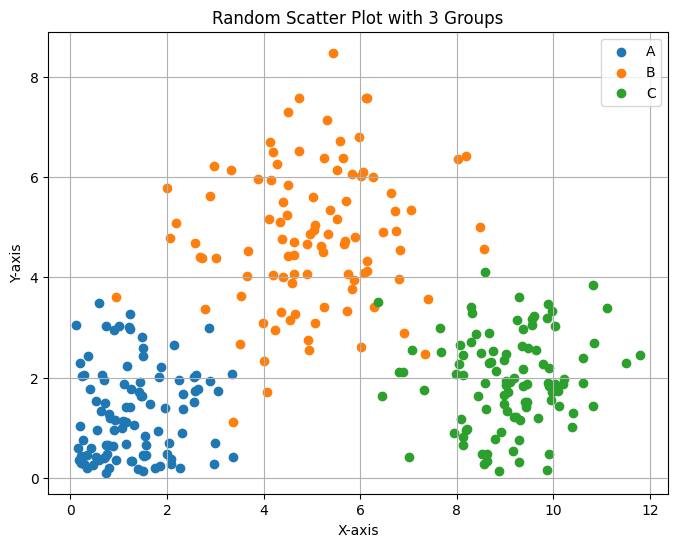

,x,y,group
0,2.864052,2.983151,A
1,1.500157,0.447759,A
2,2.078738,0.370485,A
3,3.340893,2.069397,A
4,2.967558,0.273123,A
...,...,...,...
295,9.026075,2.479236,C
296,8.441447,1.629967,C
297,8.585766,1.883269,C
298,8.081958,1.169843,C


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Random Data
np.random.seed(0)  # For reproducibility

n_samples = 100

def generate_positive_normal(loc, scale, size):
    """Generates positive values from a normal distribution."""
    arr = np.random.normal(loc=loc, scale=scale, size=size)
    arr = np.abs(arr)  # Ensure positivity
    arr = arr + 0.1 # Ensure no values are exactly zero
    return arr

# Group 1:
group1_x = generate_positive_normal(loc=1, scale=1, size=n_samples)
group1_y = generate_positive_normal(loc=1, scale=1, size=n_samples)
group1_group = ['A'] * n_samples

# Group 2:
group2_x = generate_positive_normal(loc=5, scale=1.5, size=n_samples)
group2_y = generate_positive_normal(loc=5, scale=1.5, size=n_samples)
group2_group = ['B'] * n_samples

# Group 3:
group3_x = generate_positive_normal(loc=9, scale=1, size=n_samples)
group3_y = generate_positive_normal(loc=2, scale=1, size=n_samples)
group3_group = ['C'] * n_samples

# Combine data
x = np.concatenate([group1_x, group2_x, group3_x])
y = np.concatenate([group1_y, group2_y, group3_y])
group = np.concatenate([group1_group, group2_group, group3_group])

# 2. Create Pandas DataFrame
df = pd.DataFrame({'x': x, 'y': y, 'group': group})

# 3. Generate Scatter Plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
for g in df['group'].unique():
    plt.scatter(df[df['group'] == g]['x'], df[df['group'] == g]['y'], label=g)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Random Scatter Plot with 3 Groups')
plt.legend()
plt.grid(True)
plt.show()

# 4. Print the table (DataFrame)
df

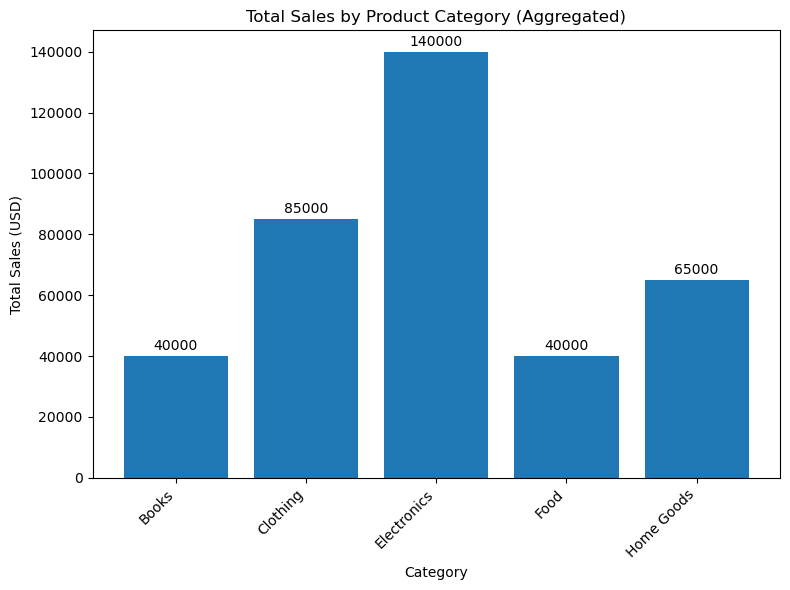

,Category,Sales,Transaction_ID
0,Electronics,60000,1
1,Clothing,30000,2
2,Books,12000,3
3,Electronics,45000,4
4,Home Goods,25000,5
5,Clothing,55000,6
6,Food,18000,7
7,Books,28000,8
8,Home Goods,40000,9
9,Electronics,35000,10


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data: Sales Transactions with Multiple Entries per Category
data = {'Category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Home Goods',
              'Clothing', 'Food', 'Books', 'Home Goods', 'Electronics', 'Food'],
        'Sales': [60000, 30000, 12000, 45000, 25000,
                  55000, 18000, 28000, 40000, 35000, 22000],
        'Transaction_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}  # Added an ID for clarity
df = pd.DataFrame(data)

# Aggregate Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Create the Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(category_sales['Category'], category_sales['Sales'])

# Add Labels and Title
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.title('Total Sales by Product Category (Aggregated)')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add the exact value on top of each bar
for i, value in enumerate(category_sales['Sales']):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')

# Show the Plot
plt.tight_layout()
plt.show()

df

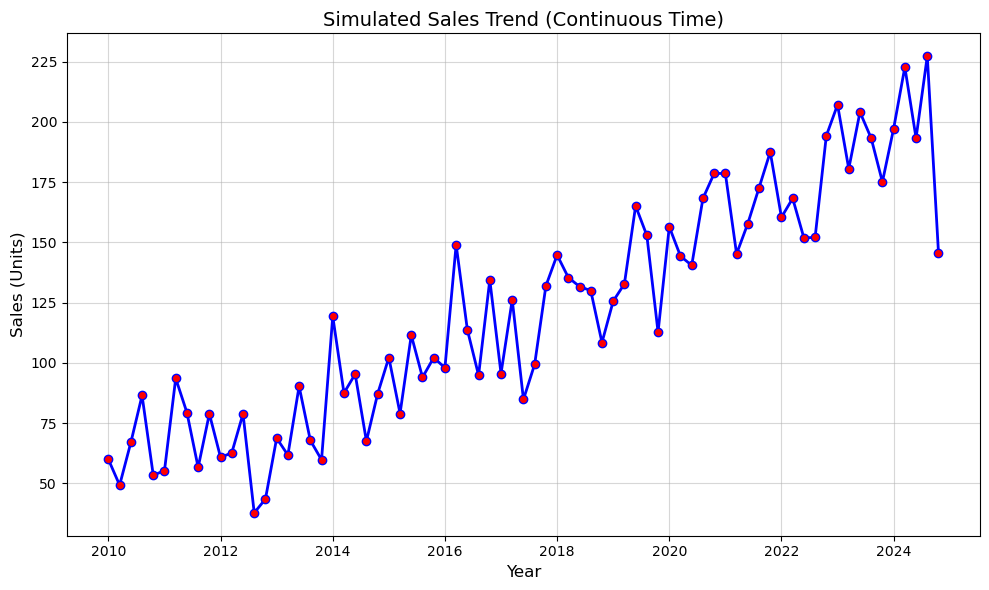

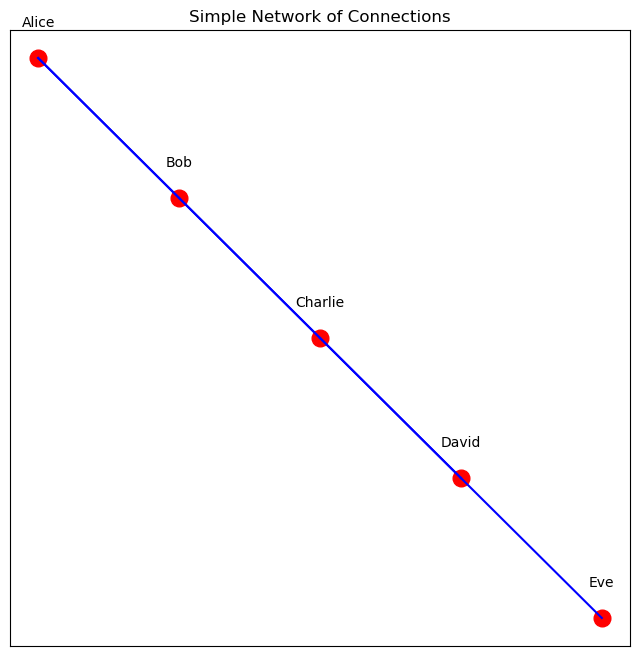

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Generate More Realistic and Continuous Data for Line Chart
np.random.seed(42)  # For reproducibility

# Simulate a time series with some trend and random fluctuations
years = np.arange(2010, 2025, 0.2)  # More data points (every 0.2 years)
base_sales = 50 + (years - 2010) * 10  # Upward trend
random_fluctuations = np.random.normal(0, 20, len(years))  # Random noise
sales = base_sales + random_fluctuations
sales = np.clip(sales, 10, 300)  # Ensure sales stay within a reasonable range

df_line_continuous = pd.DataFrame({'Year': years, 'Sales': sales})

# 2. Sample Data for a Simple Network Graph (Connections between People)
data_network = {'Person1': ['Alice', 'Alice', 'Bob', 'Charlie', 'David'],
                'Person2': ['Bob', 'Charlie', 'David', 'David', 'Eve']}
df_network = pd.DataFrame(data_network)


# --- Plotting ---

# 1. Line Chart with Continuous Variable and More Data Points
plt.figure(figsize=(10, 6))  # Slightly larger figure
plt.plot(df_line_continuous['Year'], df_line_continuous['Sales'], marker='o', linestyle='-', color='blue', linewidth=2, markersize=6) # Blue line, circle markers
plt.plot(df_line_continuous['Year'], df_line_continuous['Sales'], marker='.', linestyle='', color='red', markersize=8) # Red points, no line

plt.title('Simulated Sales Trend (Continuous Time)', fontsize=14) # More descriptive title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (Units)', fontsize=12)
plt.grid(True, alpha=0.5) # Fainter grid
plt.xticks(np.arange(2010, 2026, 2)) #  Less dense x-ticks
plt.tight_layout() # Improves layout
plt.show()


# 2. Simple Network Graph Example (No Changes Here)
plt.figure(figsize=(8, 8))
people = sorted(list(set(df_network['Person1']) | set(df_network['Person2'])))
pos = {person: i for i, person in enumerate(people)}

for person, position in pos.items():
    plt.plot(position, len(pos) - position, 'ro', markersize=12)
    plt.text(position, len(pos) - position + 0.2, person, ha='center', va='bottom')

for i, row in df_network.iterrows():
    p1 = row['Person1']
    p2 = row['Person2']
    plt.plot([pos[p1], pos[p2]], [len(pos) - pos[p1], len(pos) - pos[p2]], 'b-')

plt.title('Simple Network of Connections')
plt.xticks([])
plt.yticks([])
plt.show()

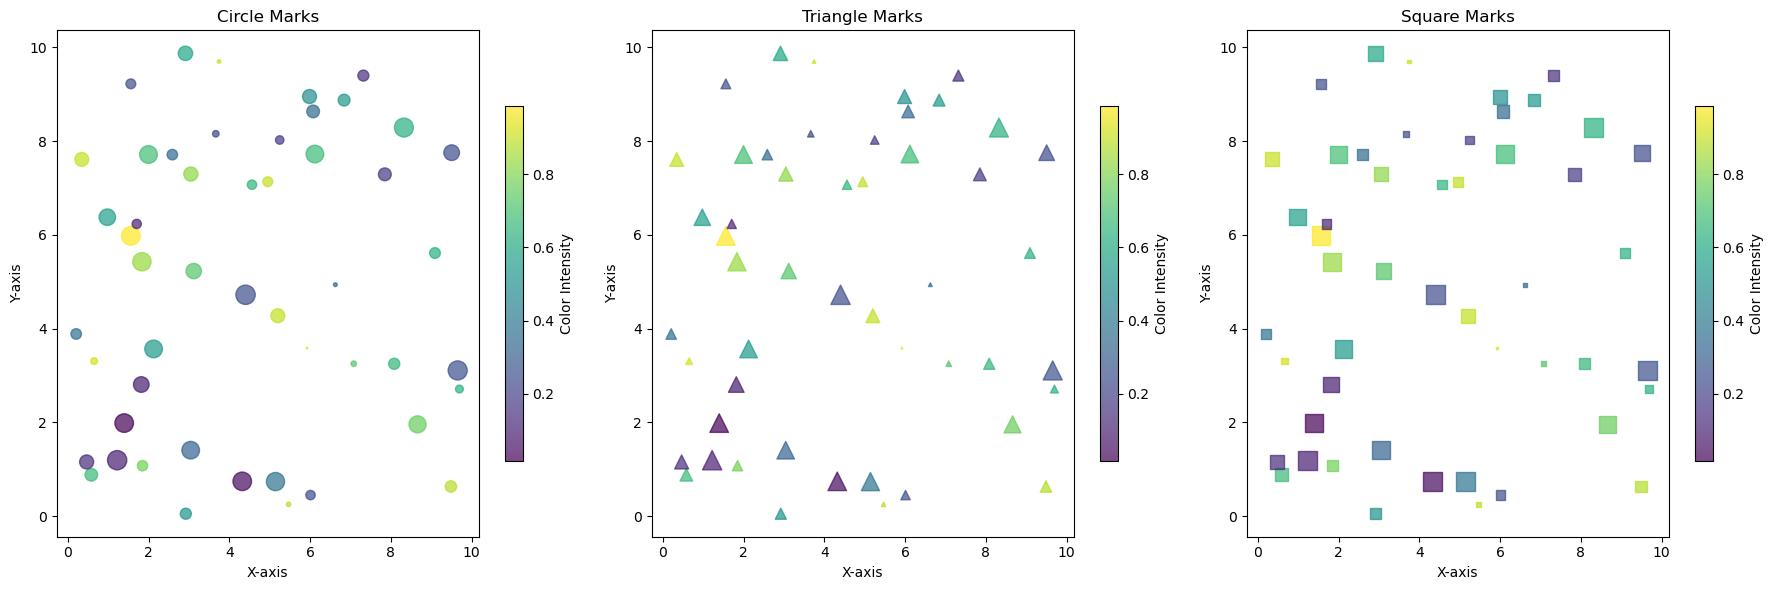

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
np.random.seed(42)
x = np.random.rand(50) * 10
y = np.random.rand(50) * 10
sizes = np.random.rand(50) * 200  # Varying sizes
colors = np.random.rand(50)       # Varying colors

# Create Scatter Plot
plt.figure(figsize=(6, 5))
plt.scatter(x, y, s=sizes, c=colors, alpha=0.7, cmap='viridis')  # 'o' is default for circles
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Point Marks (Scatter Plot)')
plt.colorbar(label='Color Intensity')  # Show color scale
plt.show()

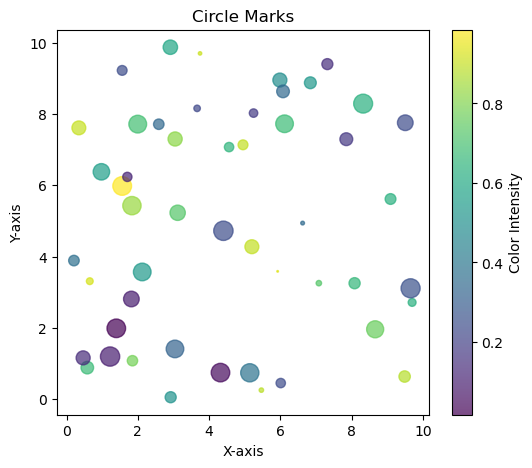

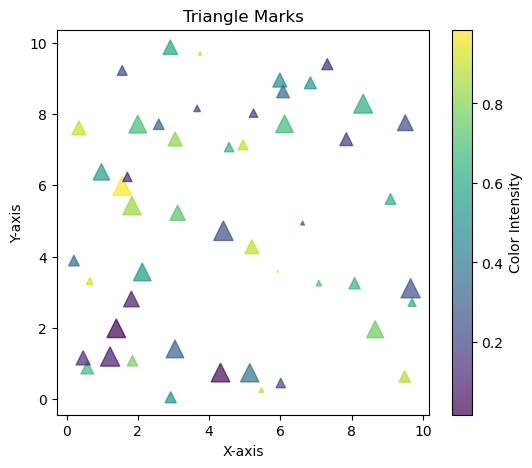

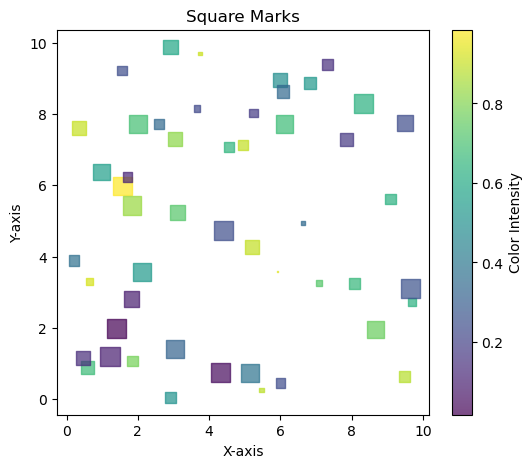

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (same as before)
np.random.seed(42)
x = np.random.rand(50) * 10
y = np.random.rand(50) * 10
sizes = np.random.rand(50) * 200
colors = np.random.rand(50)

# 1. Scatter Plot with Circle Marks (Figure 1)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, s=sizes, c=colors, marker='o', alpha=0.7, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Circle Marks')
plt.colorbar(label='Color Intensity')
plt.show()

# 2. Scatter Plot with Triangle Marks (Figure 2)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, s=sizes, c=colors, marker='^', alpha=0.7, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangle Marks')
plt.colorbar(label='Color Intensity')
plt.show()

# 3. Scatter Plot with Square Marks (Figure 3)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, s=sizes, c=colors, marker='s', alpha=0.7, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Square Marks')
plt.colorbar(label='Color Intensity')
plt.show()

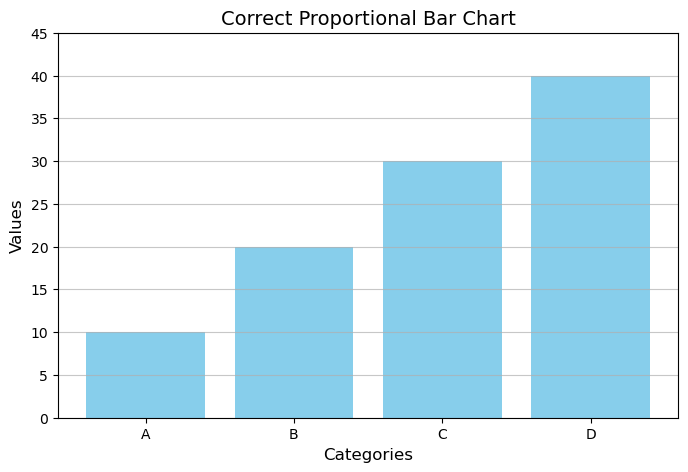

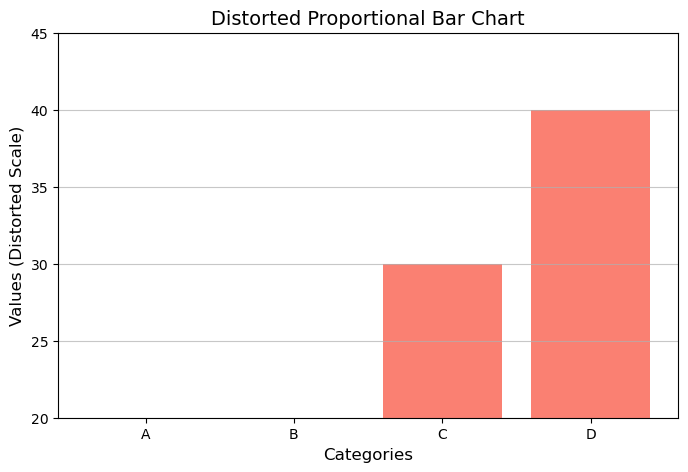

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
categories = ['A', 'B', 'C', 'D']
values = [10, 20, 30, 40]

# --- Correct Proportional Representation ---

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='skyblue')
plt.ylim(0, 45)  # Set a y-axis limit that clearly shows proportionality
plt.title('Correct Proportional Bar Chart', fontsize=14)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

# --- Distorted Proportional Representation ---

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='salmon')
plt.ylim(20, 45)  # Intentionally distorting the y-axis scale
plt.title('Distorted Proportional Bar Chart', fontsize=14)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values (Distorted Scale)', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

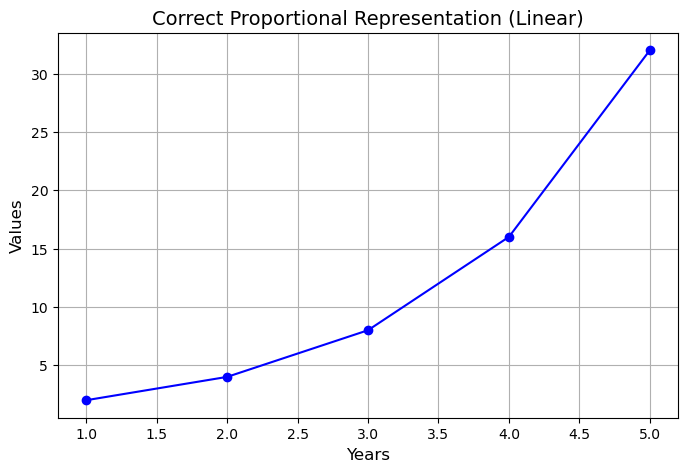

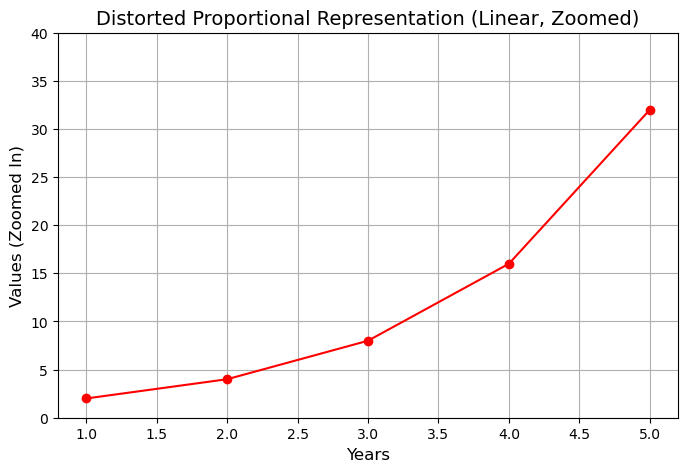

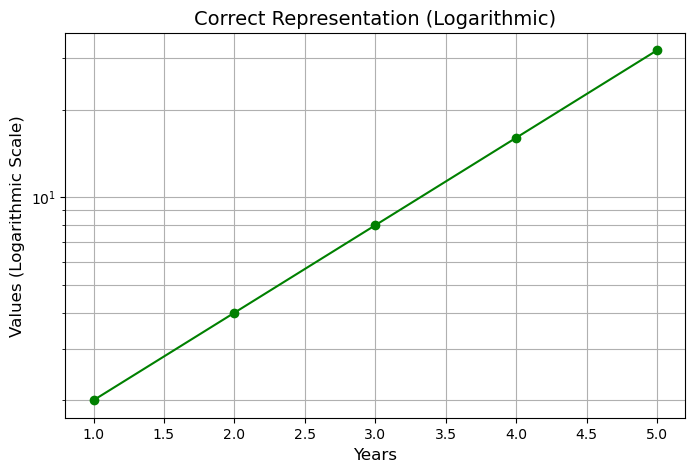

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data: Exponential Growth
years = np.array([1, 2, 3, 4, 5])
values = np.array([2, 4, 8, 16, 32])  # Exponential growth

# --- Correct Proportional Representation (Linear Y-axis) ---

plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', linestyle='-', color='blue')
plt.title('Correct Proportional Representation (Linear)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True)
plt.show()

# --- Distorted Proportional Representation (Linear Y-axis, Zoomed In) ---

plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', linestyle='-', color='red')
plt.title('Distorted Proportional Representation (Linear, Zoomed)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values (Zoomed In)', fontsize=12)
plt.ylim(0, 40)  # Zoom in on the Y-axis
plt.grid(True)
plt.show()

# --- Correct Representation (Logarithmic Y-axis) ---

plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', linestyle='-', color='green')
plt.title('Correct Representation (Logarithmic)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Values (Logarithmic Scale)', fontsize=12)
plt.yscale('log')  # Use a logarithmic y-axis
plt.grid(True, which='both')
plt.show()

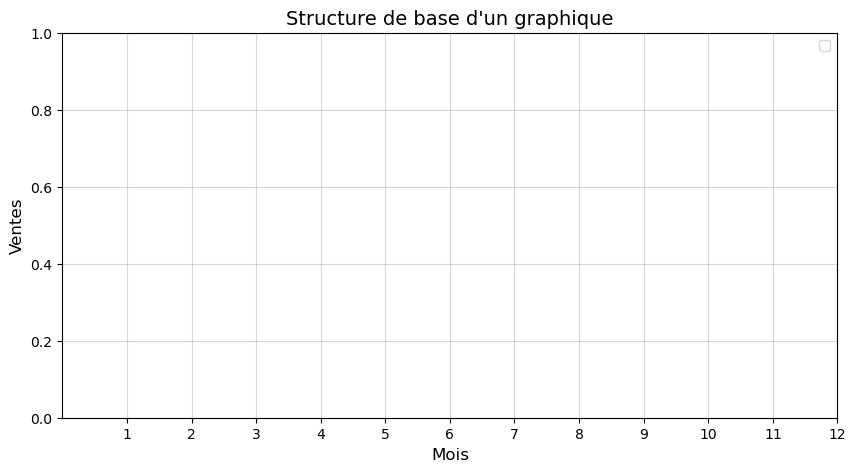

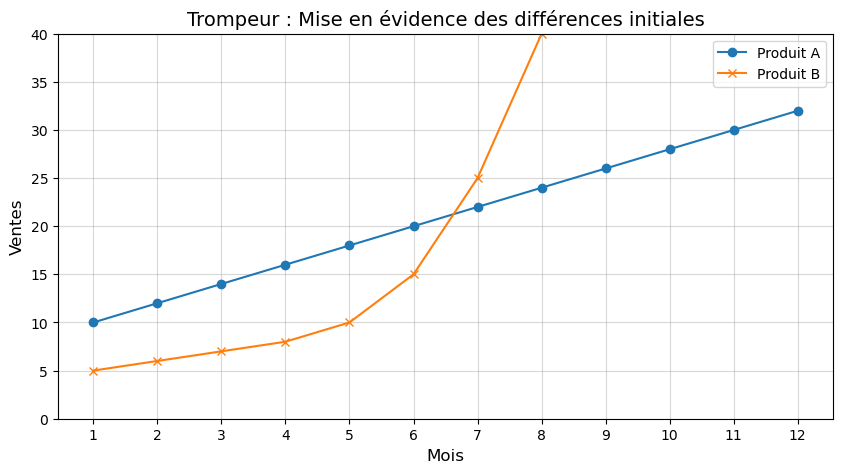

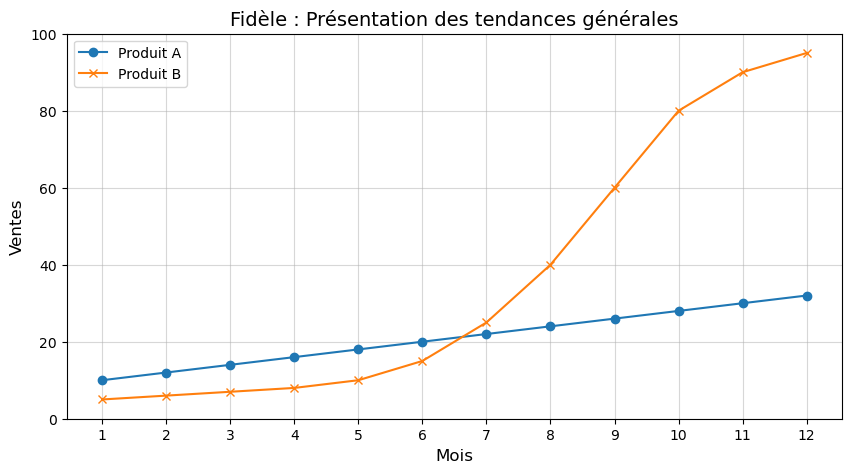

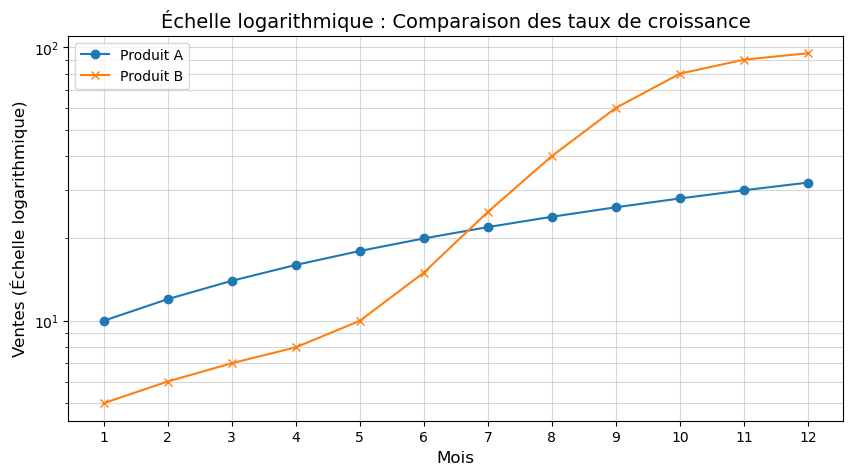

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Données d'exemple : Deux produits avec des profils de croissance différents
mois = np.arange(1, 13)
ventes_produit_a = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])  # Croissance régulière
ventes_produit_b = np.array([5, 6, 7, 8, 10, 15, 25, 40, 60, 80, 90, 95])  # Croissance rapide, puis plateau

# --- Visualisation 0 : Structure de base (pour l'éducation) ---

plt.figure(figsize=(10, 5))
plt.xticks(mois)  # Set x-ticks to be the months
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.title('Structure de base d\'un graphique', fontsize=14)
plt.legend(['Produit A', 'Produit B'])  # Placeholder legend
plt.grid(True, alpha=0.5)
plt.show()

# --- Visualisation 1 : Échelle trompeuse ---

plt.figure(figsize=(10, 5))
plt.plot(mois, ventes_produit_a, label='Produit A', marker='o')
plt.plot(mois, ventes_produit_b, label='Produit B', marker='x')
plt.xticks(mois)  # Set x-ticks to be the months
plt.ylim(0, 40)  # Restriction de l'axe des y pour souligner les différences initiales
plt.title('Trompeur : Mise en évidence des différences initiales', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# --- Visualisation 2 : Représentation fidèle ---

plt.figure(figsize=(10, 5))
plt.plot(mois, ventes_produit_a, label='Produit A', marker='o')
plt.plot(mois, ventes_produit_b, label='Produit B', marker='x')
plt.xticks(mois)  # Set x-ticks to be the months
plt.ylim(0, 100)  # Axe des y complet pour montrer l'ensemble de la situation
plt.title('Fidèle : Présentation des tendances générales', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# --- Visualisation 3 : Échelle logarithmique pour souligner le taux de croissance ---

plt.figure(figsize=(10, 5))
plt.plot(mois, ventes_produit_a, label='Produit A', marker='o')
plt.plot(mois, ventes_produit_b, label='Produit B', marker='x')
plt.xticks(mois)  # Set x-ticks to be the months
plt.yscale('log')  # Axe des y logarithmique
plt.title('Échelle logarithmique : Comparaison des taux de croissance', fontsize=14)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes (Échelle logarithmique)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5, which='both')
plt.show()

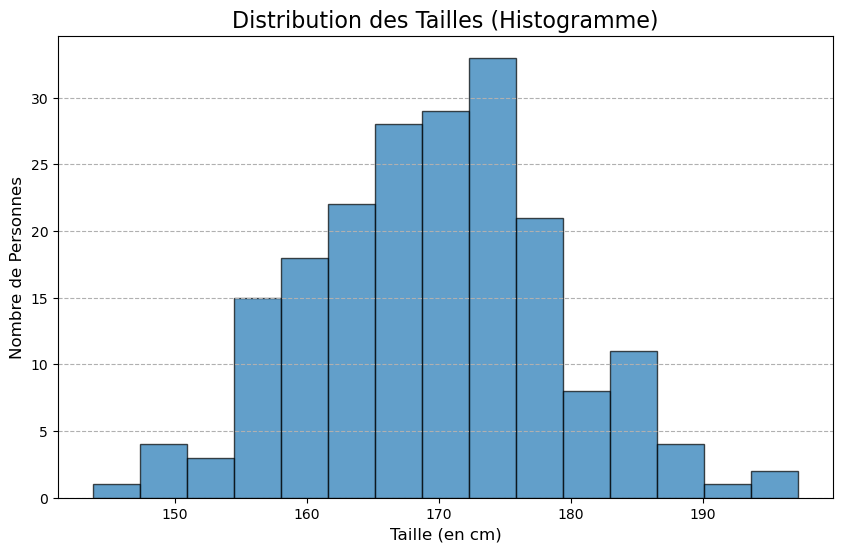

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Générer des données aléatoires pour l'exemple (par exemple, les tailles en cm d'un groupe de personnes)
np.random.seed(42) # Pour la reproductibilité
tailles = np.random.normal(loc=170, scale=10, size=200)

# Créer l'histogramme
plt.figure(figsize=(10, 6)) # Définir la taille de la figure
plt.hist(tailles, bins=15, edgecolor='black', alpha=0.7) # Créer l'histogramme

# Ajouter des titres et des labels
plt.title('Distribution des Tailles (Histogramme)', fontsize=16)
plt.xlabel('Taille (en cm)', fontsize=12)
plt.ylabel('Nombre de Personnes', fontsize=12)
plt.grid(axis='y', linestyle='--') # Ajouter une grille sur l'axe y

# Afficher l'histogramme
plt.show()

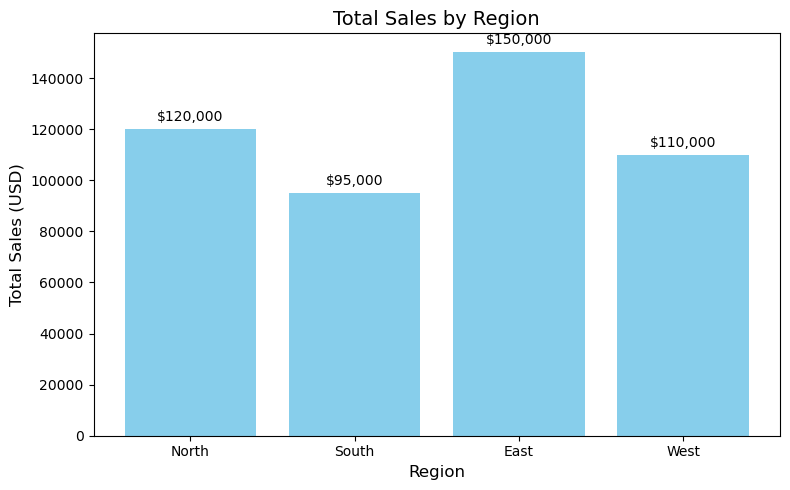

Data Used for the Bar Plot:


,Region,Sales
0,North,120000
1,South,95000
2,East,150000
3,West,110000


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data: Sales by Region
data = {'Region': ['North', 'South', 'East', 'West'],
        'Sales': [120000, 95000, 150000, 110000]}
df = pd.DataFrame(data)

# Create the Bar Plot
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
plt.bar(df['Region'], df['Sales'], color='skyblue')

# Add Labels and Title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.title('Total Sales by Region', fontsize=14)

# Add value labels on top of the bars (optional)
for i, value in enumerate(df['Sales']):
    plt.text(i, value + 2000, f'${value:,}', ha='center', va='bottom', fontsize=10)

# Show the Plot
plt.tight_layout()
plt.show()

# Display the Data Table
print("Data Used for the Bar Plot:")
df

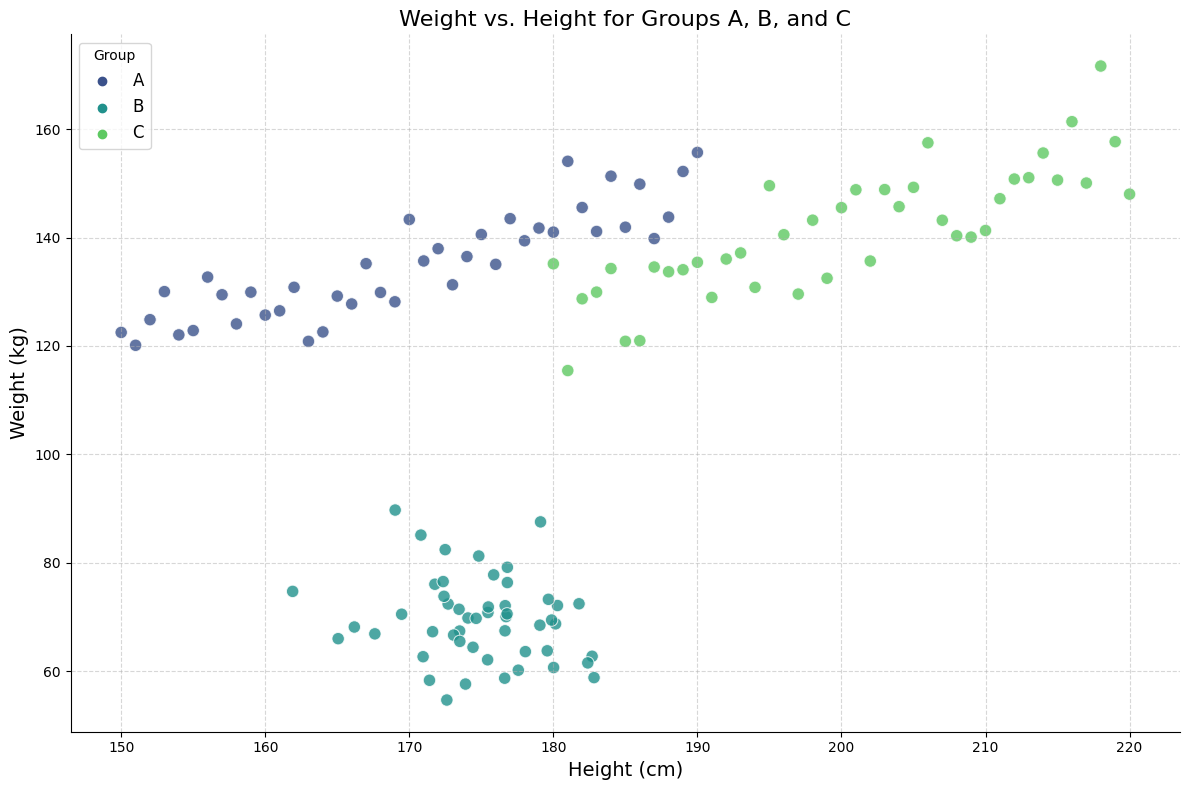

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(42)

# Create data for group A with a linear relationship
height_A = np.arange(150, 191)
weight_A = height_A * 0.8 + np.random.normal(0, 5, len(height_A))
data_A = pd.DataFrame({'Height': height_A, 'Weight': weight_A, 'Group': 'A'})

# Create data for group B clustered around a mean
mean_height_B = 175
mean_weight_B = 70
height_B = np.random.normal(mean_height_B, 5, 50)
weight_B = np.random.normal(mean_weight_B, 8, 50)
data_B = pd.DataFrame({'Height': height_B, 'Weight': weight_B, 'Group': 'B'})

# Create data for group C with a higher starting height and linear relationship
height_C = np.arange(180, 221)
weight_C = height_C * 0.7 + np.random.normal(0, 7, len(height_C))
data_C = pd.DataFrame({'Height': height_C, 'Weight': weight_C, 'Group': 'C'})

# Combine data from all groups
data = pd.concat([data_A, data_B, data_C])

# Beautiful Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Height',
    y='Weight',
    hue='Group',
    data=data,
    palette='viridis',  # Use a visually appealing palette
    s=80,             # Increase marker size
    alpha=0.8          # Add some transparency
)

plt.title('Weight vs. Height for Groups A, B, and C', fontsize=16)
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)  # Add subtle grid lines
plt.legend(title='Group', fontsize=12) #add title to legend

sns.despine()  # Remove top and right spines for cleaner look
plt.tight_layout() #avoid labels overlapping
plt.show()

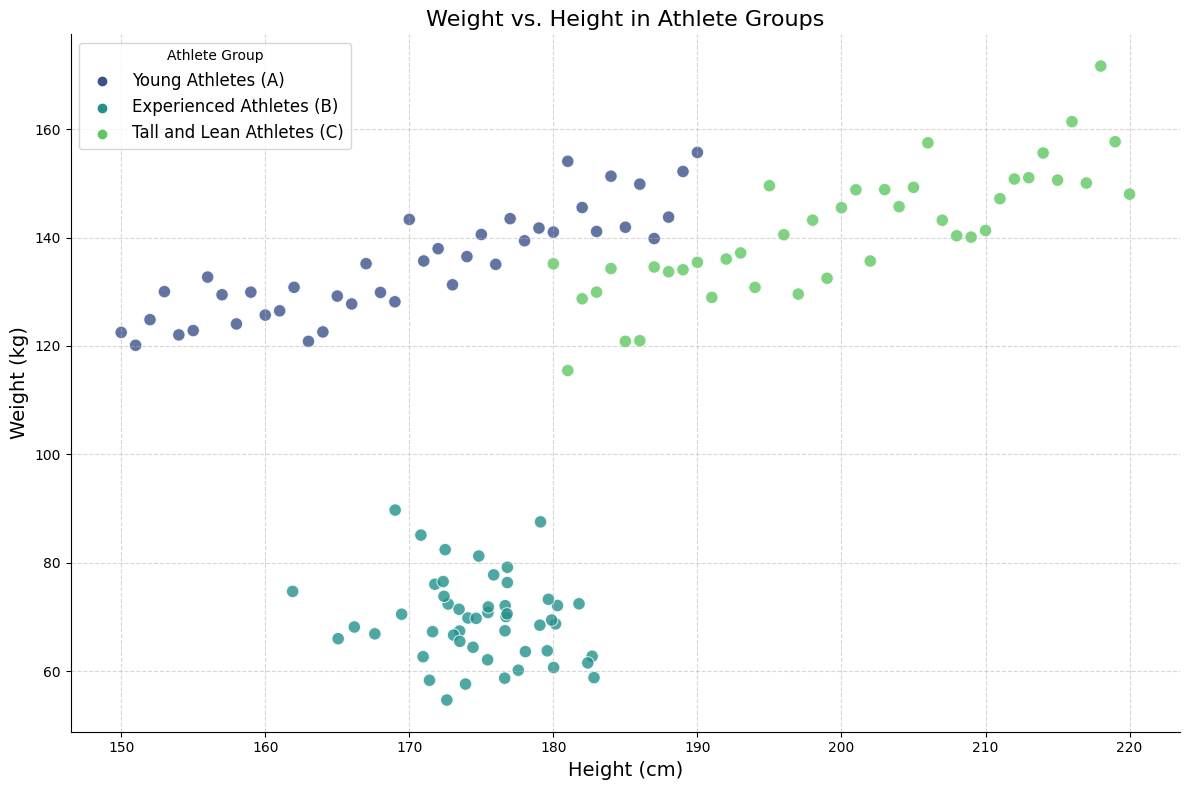

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed(42)

# Create data for group A with a linear relationship
height_A = np.arange(150, 191)
weight_A = height_A * 0.8 + np.random.normal(0, 5, len(height_A))
data_A = pd.DataFrame({'Height': height_A, 'Weight': weight_A, 'Group': 'Young Athletes (A)'})

# Create data for group B clustered around a mean
mean_height_B = 175
mean_weight_B = 70
height_B = np.random.normal(mean_height_B, 5, 50)
weight_B = np.random.normal(mean_weight_B, 8, 50)
data_B = pd.DataFrame({'Height': height_B, 'Weight': weight_B, 'Group': 'Experienced Athletes (B)'})

# Create data for group C with a higher starting height and linear relationship
height_C = np.arange(180, 221)
weight_C = height_C * 0.7 + np.random.normal(0, 7, len(height_C))
data_C = pd.DataFrame({'Height': height_C, 'Weight': weight_C, 'Group': 'Tall and Lean Athletes (C)'})

# Combine data from all groups
data = pd.concat([data_A, data_B, data_C])

# Beautiful Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Height',
    y='Weight',
    hue='Group',
    data=data,
    palette='viridis',
    s=80,
    alpha=0.8
)

plt.title('Weight vs. Height in Athlete Groups', fontsize=16)
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Athlete Group', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

Scatter plot saved to ../lab-sessions/images/athlete_scatter_plot.png


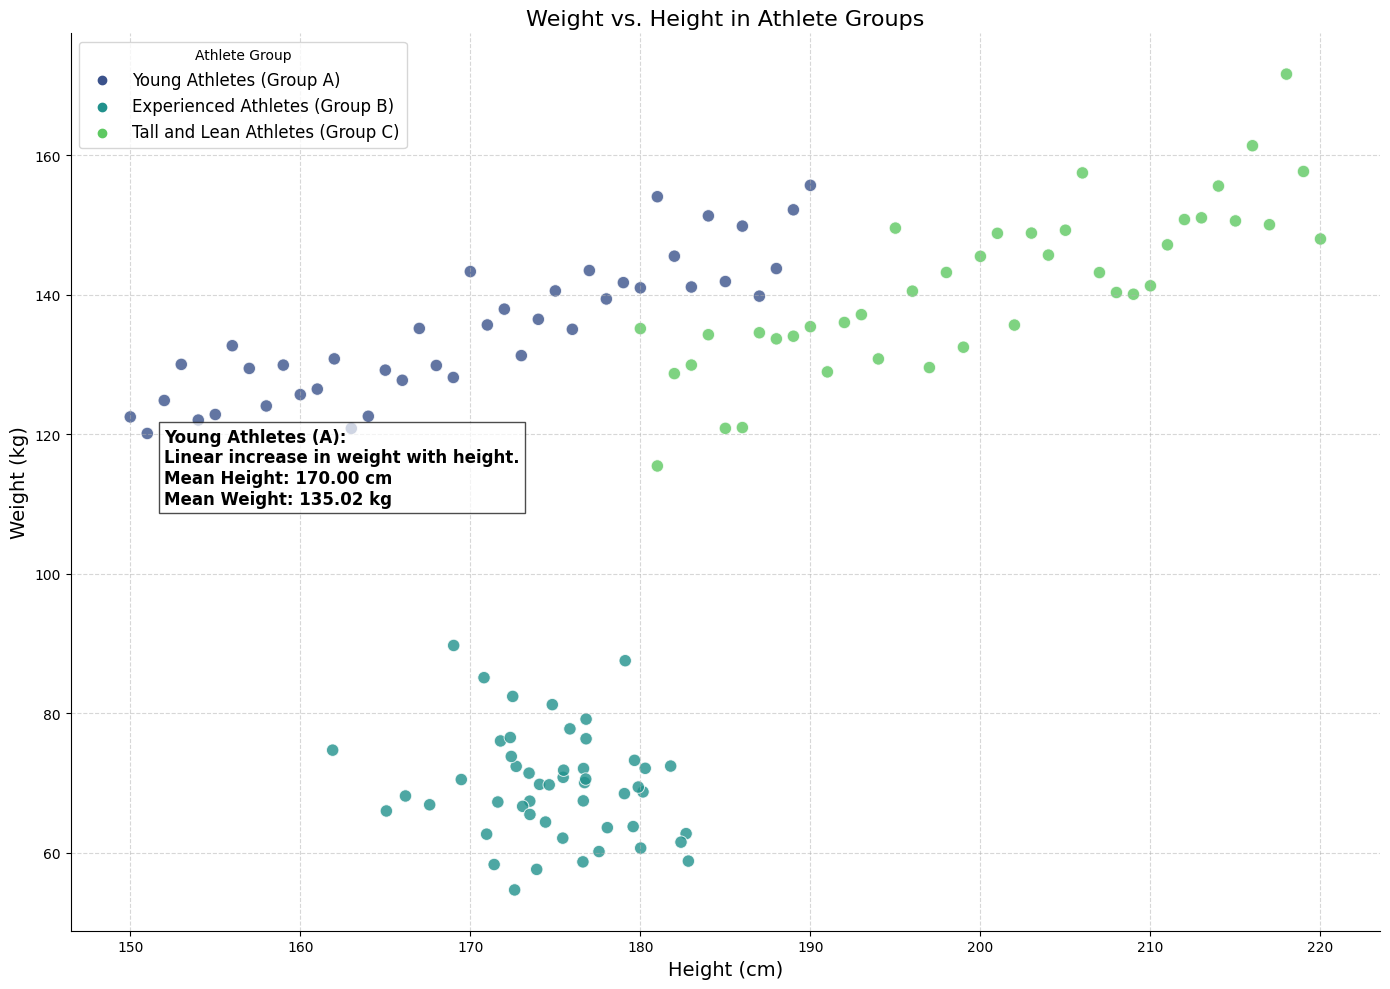

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.font_manager as fm

np.random.seed(42)

# Create data for group A with a linear relationship
height_A = np.arange(150, 191)
weight_A = height_A * 0.8 + np.random.normal(0, 5, len(height_A))
data_A = pd.DataFrame({'Height': height_A, 'Weight': weight_A, 'Group': 'Young Athletes (Group A)'})

# Create data for group B clustered around a mean
mean_height_B = 175
mean_weight_B = 70
height_B = np.random.normal(mean_height_B, 5, 50)
weight_B = np.random.normal(mean_weight_B, 8, 50)
data_B = pd.DataFrame({'Height': height_B, 'Weight': weight_B, 'Group': 'Experienced Athletes (Group B)'})

# Create data for group C with a higher starting height and linear relationship
height_C = np.arange(180, 221)
weight_C = height_C * 0.7 + np.random.normal(0, 7, len(height_C))
data_C = pd.DataFrame({'Height': height_C, 'Weight': weight_C, 'Group': 'Tall and Lean Athletes (Group C)'})

# Combine data from all groups
data = pd.concat([data_A, data_B, data_C])

# Beautiful Plotting
plt.figure(figsize=(14, 10))
ax = sns.scatterplot(
    x='Height',
    y='Weight',
    hue='Group',
    data=data,
    palette='viridis',
    s=80,
    alpha=0.8
)

plt.title('Weight vs. Height in Athlete Groups', fontsize=16)
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Athlete Group', fontsize=12)

sns.despine()
plt.tight_layout()

# Add text annotations with bold text and larger font
text_A = "Young Athletes (A):\nLinear increase in weight with height.\nMean Height: {:.2f} cm\nMean Weight: {:.2f} kg".format(data_A['Height'].mean(), data_A['Weight'].mean())
text_B = "Experienced Athletes (B):\nClustered around mean.\nMean Height: {:.2f} cm\nMean Weight: {:.2f} kg".format(data_B['Height'].mean(), data_B['Weight'].mean())
text_C = "Tall and Lean Athletes (C):\nLinear increase, higher starting height.\nMean Height: {:.2f} cm\nMean Weight: {:.2f} kg".format(data_C['Height'].mean(), data_C['Weight'].mean())

# Place text annotations near the groups with larger font and bold weight
ax.text(152, 110, text_A, fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
#ax.text(185, 50, text_B, fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
#ax.text(200, 120, text_C, fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))

# Save the matplotlib plot
image_path = "../lab-sessions/images/"
os.makedirs(image_path, exist_ok=True)
plt.savefig(os.path.join(image_path, "athlete_scatter_plot.png"), bbox_inches='tight')

print(f"Scatter plot saved to {os.path.join(image_path, 'athlete_scatter_plot.png')}")
plt.show()

Scatter plot saved to ../lab-sessions/images/athlete_scatter_plot_vertical.png


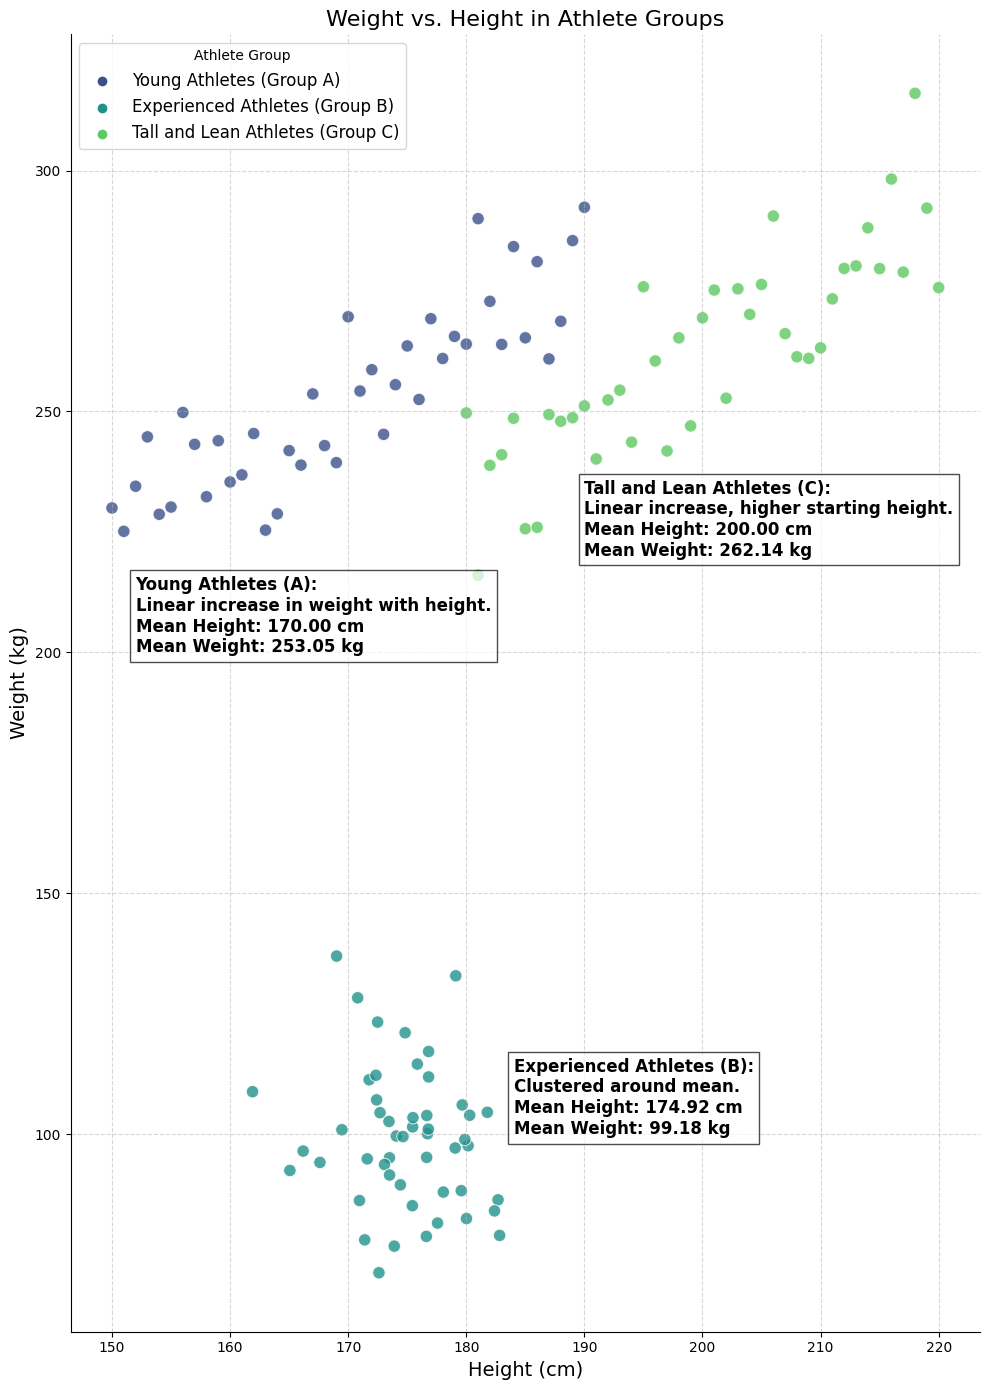

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.font_manager as fm

np.random.seed(42)

# Create data for group A with a linear relationship (more vertical)
height_A = np.arange(150, 191)
weight_A = height_A * 1.5 + np.random.normal(0, 10, len(height_A))  # Increased slope and noise
data_A = pd.DataFrame({'Height': height_A, 'Weight': weight_A, 'Group': 'Young Athletes (Group A)'})

# Create data for group B clustered around a mean (more vertical)
mean_height_B = 175
mean_weight_B = 100  # Adjusted mean weight
height_B = np.random.normal(mean_height_B, 5, 50)
weight_B = np.random.normal(mean_weight_B, 15, 50)  # Increased variance
data_B = pd.DataFrame({'Height': height_B, 'Weight': weight_B, 'Group': 'Experienced Athletes (Group B)'})

# Create data for group C with a higher starting height and linear relationship (more vertical)
height_C = np.arange(180, 221)
weight_C = height_C * 1.3 + np.random.normal(0, 12, len(height_C))  # Increased slope and noise
data_C = pd.DataFrame({'Height': height_C, 'Weight': weight_C, 'Group': 'Tall and Lean Athletes (Group C)'})

# Combine data from all groups
data = pd.concat([data_A, data_B, data_C])

# Beautiful Plotting
plt.figure(figsize=(10, 14)) # Swapped width and height.
ax = sns.scatterplot(
    x='Height',
    y='Weight',
    hue='Group',
    data=data,
    palette='viridis',
    s=80,
    alpha=0.8
)

plt.title('Weight vs. Height in Athlete Groups', fontsize=16)
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Athlete Group', fontsize=12)

sns.despine()
plt.tight_layout()

# Add text annotations with bold text and larger font
text_A = "Young Athletes (A):\nLinear increase in weight with height.\nMean Height: {:.2f} cm\nMean Weight: {:.2f} kg".format(data_A['Height'].mean(), data_A['Weight'].mean())
text_B = "Experienced Athletes (B):\nClustered around mean.\nMean Height: {:.2f} cm\nMean Weight: {:.2f} kg".format(data_B['Height'].mean(), data_B['Weight'].mean())
text_C = "Tall and Lean Athletes (C):\nLinear increase, higher starting height.\nMean Height: {:.2f} cm\nMean Weight: {:.2f} kg".format(data_C['Height'].mean(), data_C['Weight'].mean())

# Place text annotations near the groups with larger font and bold weight
ax.text(152, 200, text_A, fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7)) #adjusted y coordinate
ax.text(184, 100, text_B, fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7)) #adjusted y coordinate
ax.text(190, 220, text_C, fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7)) #adjusted y coordinate

# Save the matplotlib plot
image_path = "../lab-sessions/images/"
os.makedirs(image_path, exist_ok=True)
plt.savefig(os.path.join(image_path, "athlete_scatter_plot_vertical.png"), bbox_inches='tight') #saved with a new name.

print(f"Scatter plot saved to {os.path.join(image_path, 'athlete_scatter_plot_vertical.png')}")
plt.show()

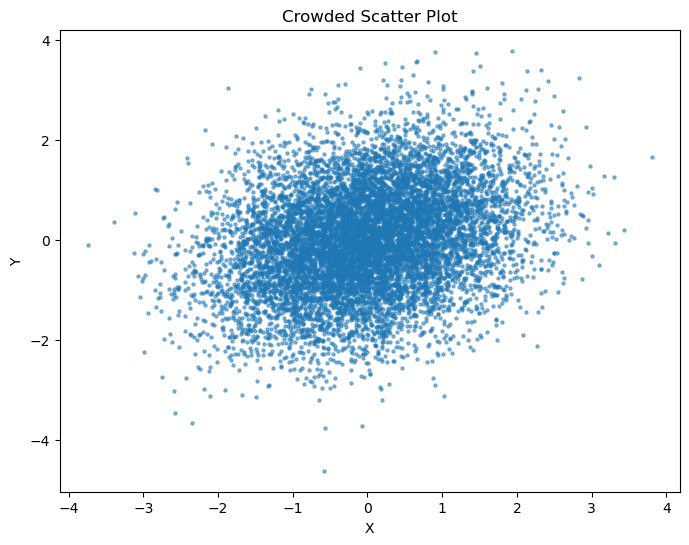

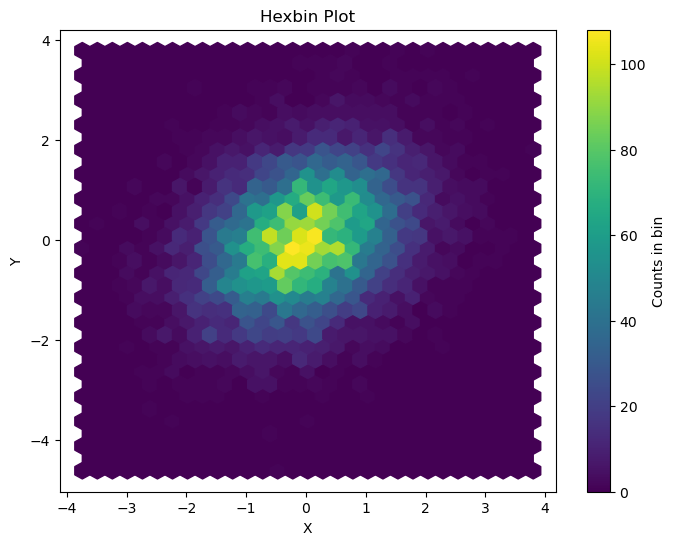

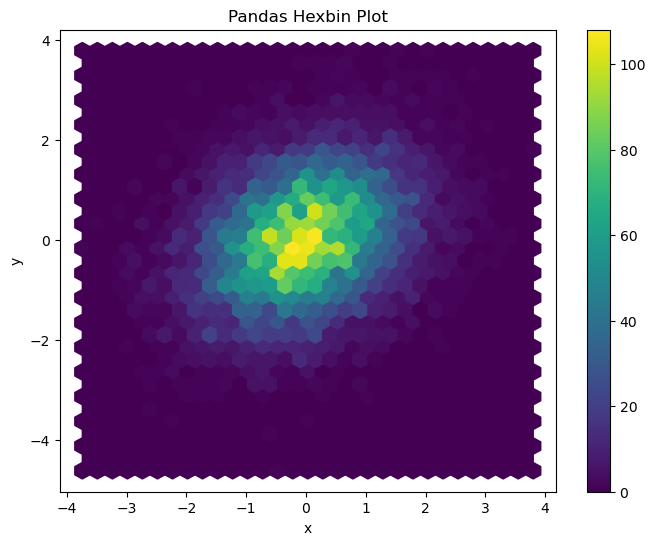

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate some crowded data
np.random.seed(0)  # for reproducibility
n_points = 10000
x = np.random.normal(0, 1, n_points)
y = np.random.normal(0, 1, n_points) + 0.3 * x  # add some correlation

df = pd.DataFrame({'x': x, 'y': y})

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], alpha=0.5, s=5) #alpha to show overlap
plt.title('Crowded Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['x'], df['y'], gridsize=30, cmap='viridis')  # Adjust gridsize for bin size
plt.colorbar(label='Counts in bin')
plt.title('Hexbin Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Hexbin with pandas
df.plot.hexbin(x='x', y='y', gridsize=30, figsize=(8, 6), cmap='viridis')
plt.title('Pandas Hexbin Plot')
plt.show()

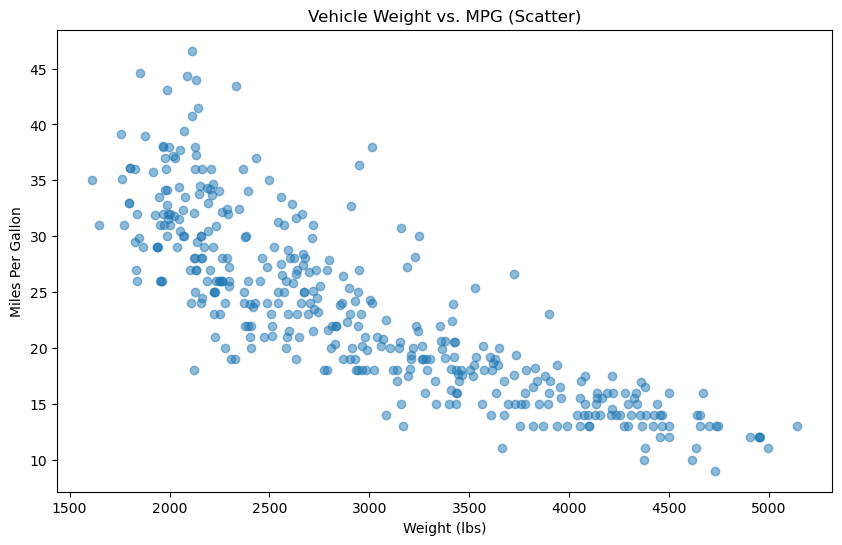

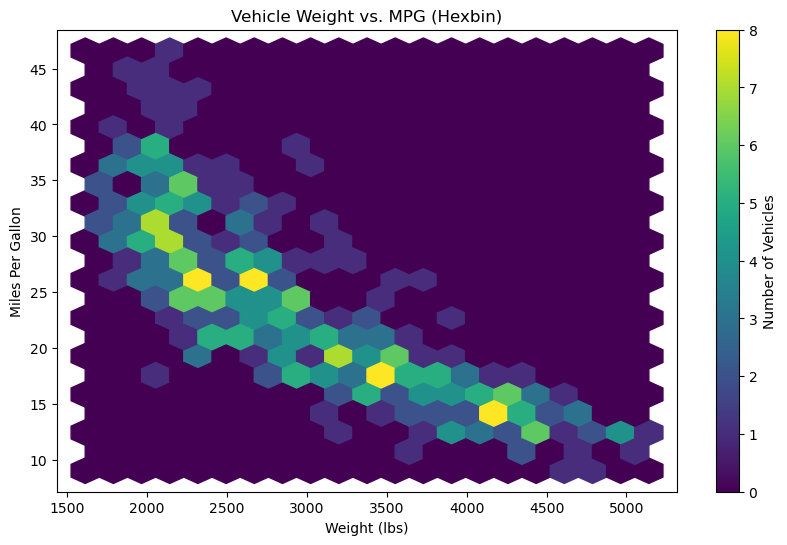

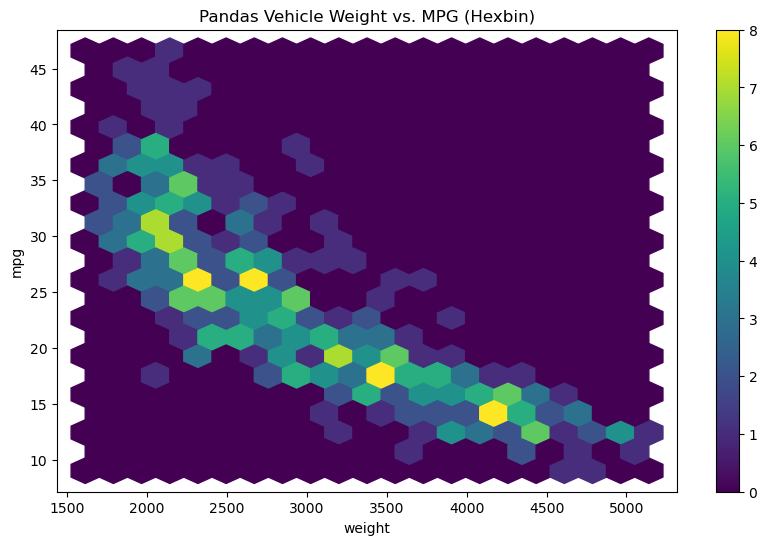

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the 'mpg' dataset (miles per gallon)
mpg = sns.load_dataset('mpg')
mpg = mpg.dropna() #remove NA values

# Scatter plot: Weight vs. MPG
plt.figure(figsize=(10, 6))
plt.scatter(mpg['weight'], mpg['mpg'], alpha=0.5)
plt.title('Vehicle Weight vs. MPG (Scatter)')
plt.xlabel('Weight (lbs)')
plt.ylabel('Miles Per Gallon')
plt.show()

# Hexbin plot: Weight vs. MPG
plt.figure(figsize=(10, 6))
plt.hexbin(mpg['weight'], mpg['mpg'], gridsize=20, cmap='viridis')
plt.colorbar(label='Number of Vehicles')
plt.title('Vehicle Weight vs. MPG (Hexbin)')
plt.xlabel('Weight (lbs)')
plt.ylabel('Miles Per Gallon')
plt.show()

#Pandas hexbin
mpg.plot.hexbin(x='weight', y='mpg', gridsize=20, figsize=(10,6), cmap='viridis')
plt.title('Pandas Vehicle Weight vs. MPG (Hexbin)')
plt.show()

# Analysis:

# Scatter Plot Observations:
# - A general negative correlation is visible (heavier cars tend to have lower MPG).
# - It's hard to see the precise distribution of vehicles across different weight and MPG ranges.
# - It's difficult to see any subtle clusters or patterns.

# Hexbin Plot Observations:
# - The hexbin plot reveals the density of vehicles more clearly.
# - A large concentration of vehicles is in the 2000-3500 lbs weight range and the 15-30 MPG range.
# - There's a noticeable concentration of very light cars that achieve very high MPG.
# - The hexbin plot shows that the highest density is not along a perfect line, but rather a more spread out, curved shape.
# - The hexbin shows that the very high MPG cars are almost all light, and that heavier cars almost never achieve very high MPG.
# - The hexbin plot reveals that the concentration of cars drops very quickly when moving to heavier weights, and lower MPGs. It is easier to see the dropoff than with the scatter plot.
# - The hexbin plot shows the data density much more efficiently than the scatter plot, enabling more precise data analysis.

In [11]:
import seaborn as sns
mpg_df = sns.load_dataset("mpg")
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<Axes: xlabel='weight', ylabel='mpg'>

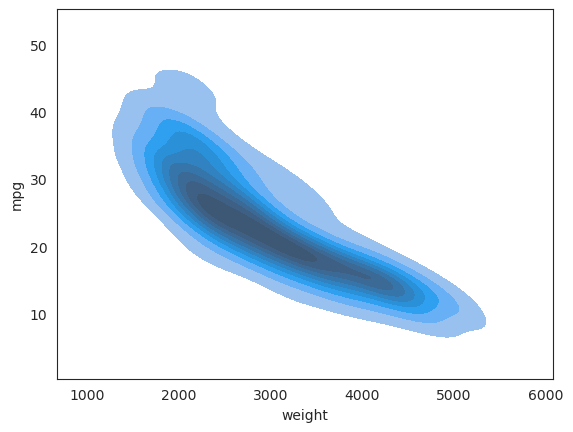

In [12]:
sns.set_style("white")
sns.kdeplot(data=mpg_df, x='weight', y='mpg', fill=True) 

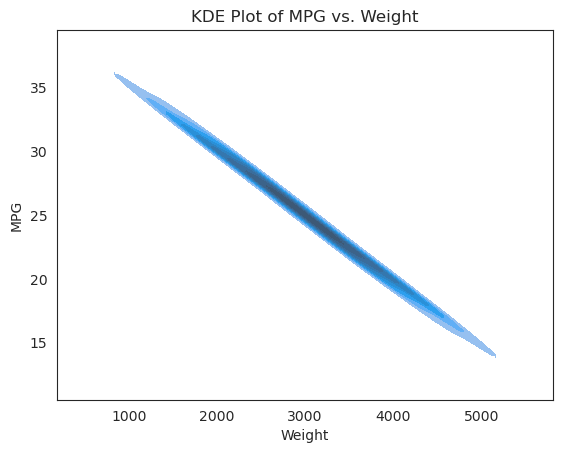

In [10]:
import seaborn as sns
import pandas as pd # if you are indeed using a dataframe.

# Assuming mpg_df is your DataFrame
# Example DataFrame creation for testing (if you don't have mpg_df)
data = {'weight': [2000, 2500, 3000, 3500, 4000],
        'mpg': [30, 28, 25, 22, 20]}
mpg_df = pd.DataFrame(data)

# Corrected kdeplot usage
sns.kdeplot(x=mpg_df.weight, y=mpg_df.mpg, fill=True) #using fill instead of shade

#Alternatively, if you want to use the dataframe directly.
##this is the more modern way.

#Add a title and labels.
import matplotlib.pyplot as plt
plt.title("KDE Plot of MPG vs. Weight")
plt.xlabel("Weight")
plt.ylabel("MPG")

plt.show()

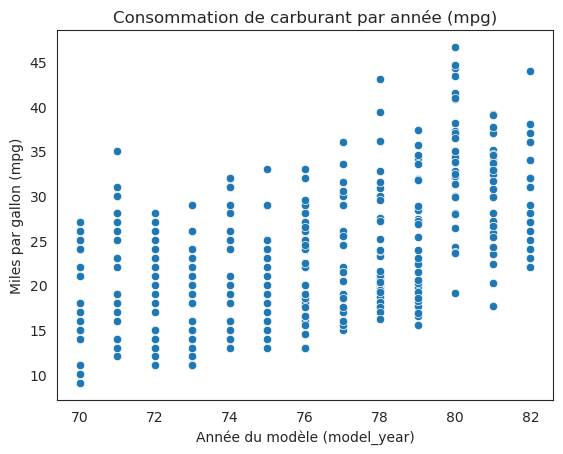

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mpg_df is your DataFrame

ax1 = sns.scatterplot(x="model_year", y="mpg", data=mpg_df)
plt.title("Consommation de carburant par année (mpg)") # or "Fuel Consumption per Year (mpg)"
plt.xlabel("Année du modèle (model_year)") # or "Model Year"
plt.ylabel("Miles par gallon (mpg)") # or "Miles per Gallon (mpg)"
plt.show()

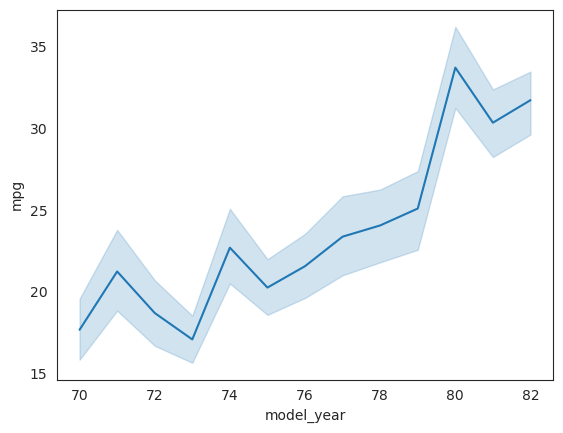

In [15]:
ax = sns.lineplot(x="model_year", y="mpg", data=mpg_df)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mpg_df is your DataFrame

# Scatter Plot
ax1 = sns.scatterplot(x="model_year", y="mpg", data=mpg_df)
min_y, max_y = ax1.get_ylim()  # Get the y-axis limits from the scatter plot

plt.title("Scatter Plot: MPG vs. Model Year")
plt.show()

# Line Plot with the SAME y-axis limits
ax2 = sns.lineplot(x="model_year", y="mpg", data=mpg_df)
plt.ylim(min_y, max_y)  # Set the y-axis limits of the line plot to match the scatter plot

plt.title("Line Plot: MPG vs. Model Year (Same Y-Axis)")
plt.show()

NameError: name 'mpg_df' is not defined

In [13]:
import seaborn as sns
flights_df = sns.load_dataset('flights')
flights_df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [11]:
df_pivoted = flights_df.pivot(index="month", columns="year", values="passengers")

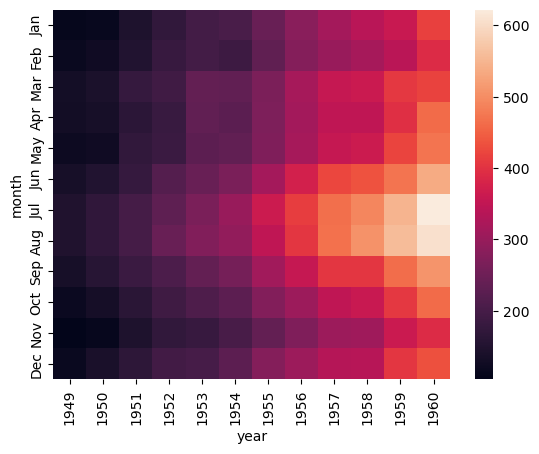

In [12]:
ax = sns.heatmap(df_pivoted)

<Axes: xlabel='model_year', ylabel='mpg'>

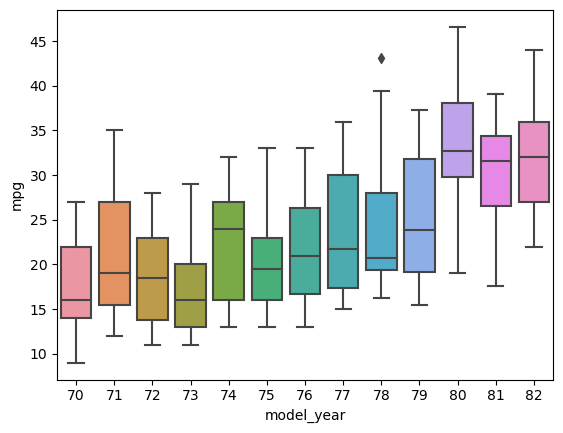

In [15]:
mpg_df = sns.load_dataset("mpg")
sns.boxplot(x='model_year', y='mpg', data=mpg_df)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx

# 1. Frequency Analysis (Bar Chart)
def plot_word_frequency(words, counts, n=20):
    top_words = list(zip(words[:n], counts[:n]))
    top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])
    sns.barplot(x='count', y='word', data=top_words_df)
    plt.title('Top {} Word Frequencies'.format(n))
    plt.show()

# 2. Text Length Distribution (Histogram)
def plot_text_length_histogram(lengths, unit='words'):
    plt.hist(lengths, bins=30)
    plt.xlabel('Number of {}'.format(unit))
    plt.ylabel('Frequency')
    plt.title('Distribution of Text Lengths')
    plt.show()

# 3. Co-occurrence Networks (Network Graph)
def plot_cooccurrence_network(cooccurrence_matrix, words):
    graph = nx.Graph(cooccurrence_matrix)
    nx.draw_networkx(graph, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title('Co-occurrence Network')
    plt.show()

# 4. Sentiment Visualization (Pie Chart)
def plot_sentiment_pie_chart(sentiment_counts):
    plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%')
    plt.title('Sentiment Distribution')
    plt.show()

# 5. Topic Modeling Visualization (Word Clouds per Topic)
def plot_word_clouds_for_topics(topics, n_words=10):
    for topic_id, word_weights in topics.items():
        top_words = {word: weight for word, weight in sorted(word_weights.items(), key=lambda item: item[1], reverse=True)[:n_words]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title('Topic {}'.format(topic_id))
        plt.axis('off')
        plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rosana.eljurdi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rosana.eljurdi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


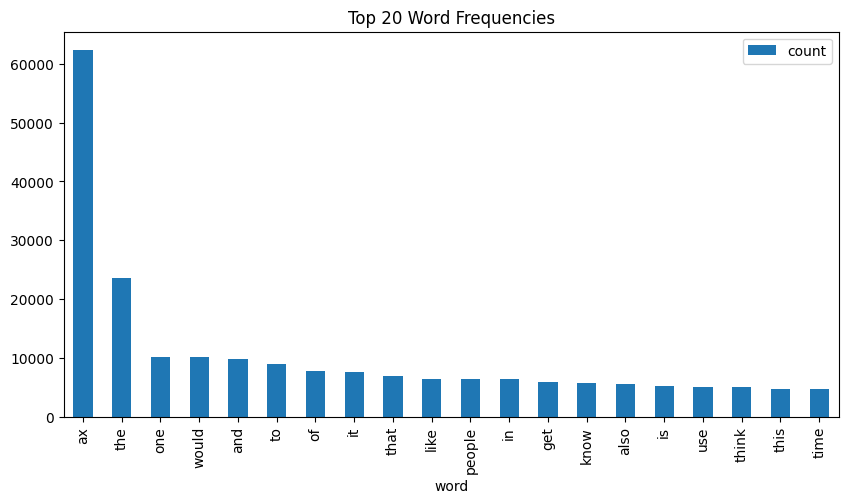

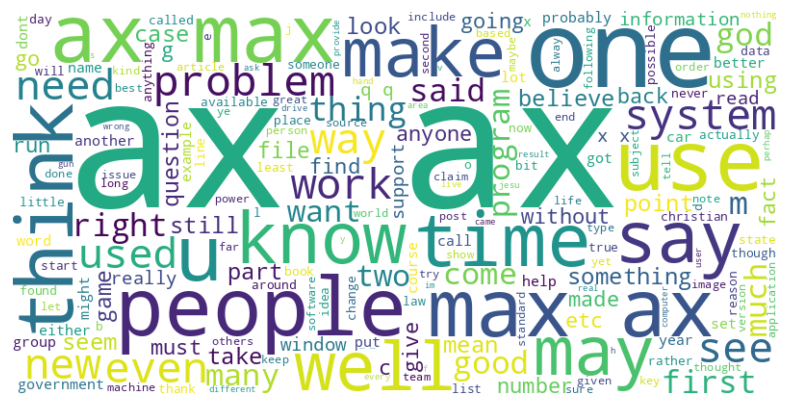

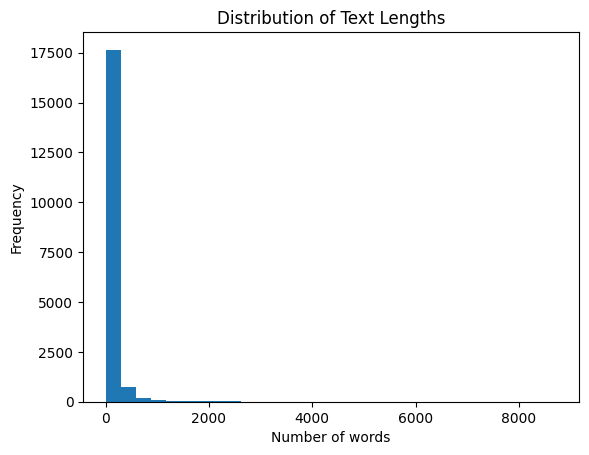

In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
import re
import nltk
from nltk.corpus import stopwords

# 1. Dataset Selection and Loading
# Using the 20 Newsgroups dataset for text data
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

# 2. Text Preprocessing
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)  # Remove punctuation
    text = text.lower()  # Lowercase
    text = [token for token in text.split(" ") if token not in stop_words]  # Remove stopwords
    text = " ".join(text)
    return text

data['text'] = data['text'].apply(clean_text)

# 3. Visualization Techniques and Analysis

# A. Word Frequency Analysis (Bar Chart)
def plot_top_words(corpus, n=20):
    vectorizer = CountVectorizer().fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = pd.DataFrame(words_freq[:n], columns=['word', 'count'])
    top_words.plot(x='word', y='count', kind='bar', figsize=(10, 5))
    plt.title(f'Top {n} Word Frequencies')
    plt.show()

plot_top_words(data['text'])

# B. Word Clouds
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_wordcloud(data['text'])

# C. Text Length Distribution (Histogram)
def plot_text_length_histogram(lengths, unit='words'):
    plt.hist(lengths, bins=30)
    plt.xlabel(f'Number of {unit}')
    plt.ylabel('Frequency')
    plt.title('Distribution of Text Lengths')
    plt.show()

data['text_length'] = data['text'].apply(lambda x: len(x.split()))
plot_text_length_histogram(data['text_length'], unit='words')

# D. Co-occurrence Networks
def plot_cooccurrence_network(corpus, n=10):
    vectorizer = CountVectorizer(ngram_range=(2, 2))  # Bigrams for co-occurrence
    vectorizer.fit(corpus)
    matrix = vectorizer.transform(corpus)
    
    # Calculate co-occurrence matrix (simplified for demonstration)
    cooccurrence_matrix = (matrix.T * matrix)
    
    graph = nx.Graph()
    vocab = vectorizer.vocabulary_
    
    for word1, idx1 in vocab.items():
        if idx1 in matrix.indices and idx1 < n:
            for word2, idx2 in vocab.items():
                if idx2 in matrix.indices and idx2 < n and idx1 != idx2:
                    weight = cooccurrence_matrix[idx1, idx2]
                    if weight > 0:
                        graph.add_edge(word1, word2, weight=weight)

    pos = nx.spring_layout(graph)
    nx.draw_networkx(graph, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title('Co-occurrence Network')
    plt.show()

plot_cooccurrence_network(data['text'], n=10)

# E. Topic Modeling Visualization
def plot_top_words_per_topic(corpus, n_topics=5, n_words=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(X)

    feature_names = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
        topics[topic_idx] = top_words

    for topic_id, word_list in topics.items():
        print(f"Topic {topic_id}: {', '.join(word_list)}")
        plot_wordcloud(word_list)

plot_top_words_per_topic(data['text'], n_topics=5, n_words=10)

# Text data visualization


--- Initial Exploration with Frequency Analysis ---


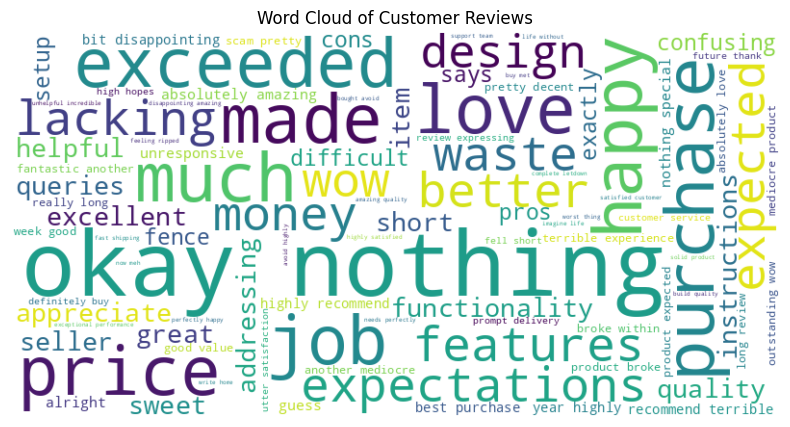

Word cloud generated - quickly shows prominent terms.


In [6]:
import nltk
# After downloading, you can run the rest of your code
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Simulate a large text dataset (replace with your actual data loading)
data = {
    'review_text': [
        "This product is absolutely amazing! I love it so much.",
        "It's okay, nothing special. A bit disappointing.",
        "The best purchase I've made all year. Highly recommend!",
        "Terrible experience. The product broke within a week.",
        "Good value for the price. Does the job.",
        "I'm so happy with this! It exceeded my expectations.",
        "Could be better. The features are lacking.",
        "Don't waste your money. This is a scam.",
        "Pretty decent, but not outstanding.",
        "Wow! Just wow! This is fantastic.",
        "Another mediocre product. Expected more.",
        "Absolutely love the design and functionality.",
        # ... add many more reviews to simulate a large dataset
        "This is a really long review expressing my utter satisfaction with the item. I appreciate the quality and the prompt delivery. The customer service was also excellent and very helpful in addressing my queries. I would definitely buy from this seller again in the future. Thank you!",
        "Short and sweet: it's great!",
        "The instructions were confusing and the setup was difficult.",
        "I had high hopes, but this fell short. Very disappointing.",
        "Amazing quality and fast shipping. A+++",
        "Not what I expected at all. Feeling ripped off.",
        "Solid product, does exactly what it says.",
        "I'm on the fence. It has some pros and cons.",
        "This is the worst thing I've ever bought. Avoid!",
        "Highly satisfied customer here!",
        "Just okay. Nothing to write home about.",
        "Exceptional performance and build quality.",
        "A complete letdown. Do not buy.",
        "Met my needs perfectly. Happy with the purchase.",
        "The support team was unresponsive and unhelpful.",
        "Incredible! I can't imagine life without it now.",
        "Meh. It's alright, I guess.",
    ] * 50  # Repeat reviews to simulate a larger dataset
}
df = pd.DataFrame(data)

# 1. Basic Frequency Analysis (Word Clouds & Bar Charts)
print("\n--- Initial Exploration with Frequency Analysis ---")

# Combine all review text into a single string
all_text = ' '.join(df['review_text']).lower()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Customer Reviews")
plt.show()
print("Word cloud generated - quickly shows prominent terms.")


In [4]:
import nltk

try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer already downloaded.")
except nltk.downloader.DownloadError:
    print("Downloading Punkt tokenizer...")
    nltk.download('punkt')
    print("Punkt tokenizer downloaded successfully.")

try:
    nltk.data.find('corpora/stopwords')
    print("Stopwords corpus already downloaded.")
except nltk.downloader.DownloadError:
    print("Downloading stopwords corpus...")
    nltk.download('stopwords')
    print("Stopwords corpus downloaded successfully.")

Punkt tokenizer already downloaded.
Stopwords corpus already downloaded.


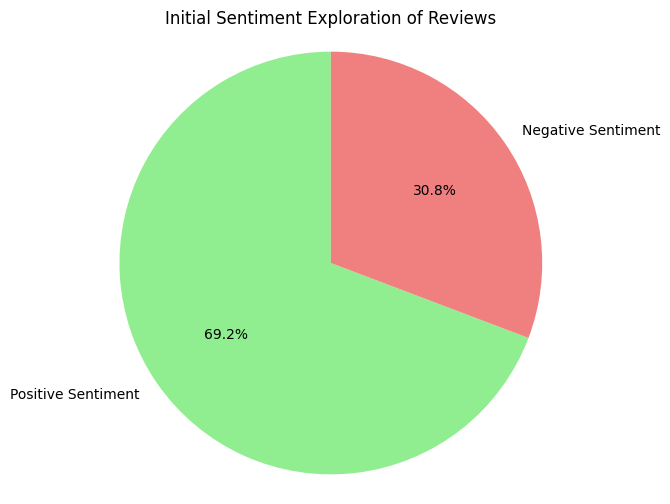


Based on this simple visualization, we can quickly see the rough proportion of positive and negative sentiment in our initial look at the reviews.


In [7]:
import matplotlib.pyplot as plt
from collections import Counter

# Imagine this is a tiny piece of a huge set of customer reviews
all_reviews = [
    "Great product! Loved it.",
    "It was okay, not great.",
    "Amazing! Highly recommend.",
    "Terrible, do not buy!",
    "Good for the price.",
    "So happy with this!",
    "Could be better.",
    "Don't waste your money.",
    "Pretty good overall.",
    "Fantastic!",
    "Not good at all.",
    "Love the features!",
]

# Let's count how many times "good" and "bad" words appear
positive_words = ["great", "amazing", "happy", "good", "fantastic", "love"]
negative_words = ["terrible", "not good", "don't waste", "could be better"]

positive_count = 0
negative_count = 0

for review in all_reviews:
    review_lower = review.lower()
    for word in positive_words:
        if word in review_lower:
            positive_count += 1
            break # Count a review only once for positive if it contains any positive word
    for word in negative_words:
        if word in review_lower:
            negative_count += 1
            break # Count a review only once for negative

# Now, let's visualize these counts
labels = ['Positive Sentiment', 'Negative Sentiment']
counts = [positive_count, negative_count]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Initial Sentiment Exploration of Reviews')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"\nBased on this simple visualization, we can quickly see the rough proportion of positive and negative sentiment in our initial look at the reviews.")

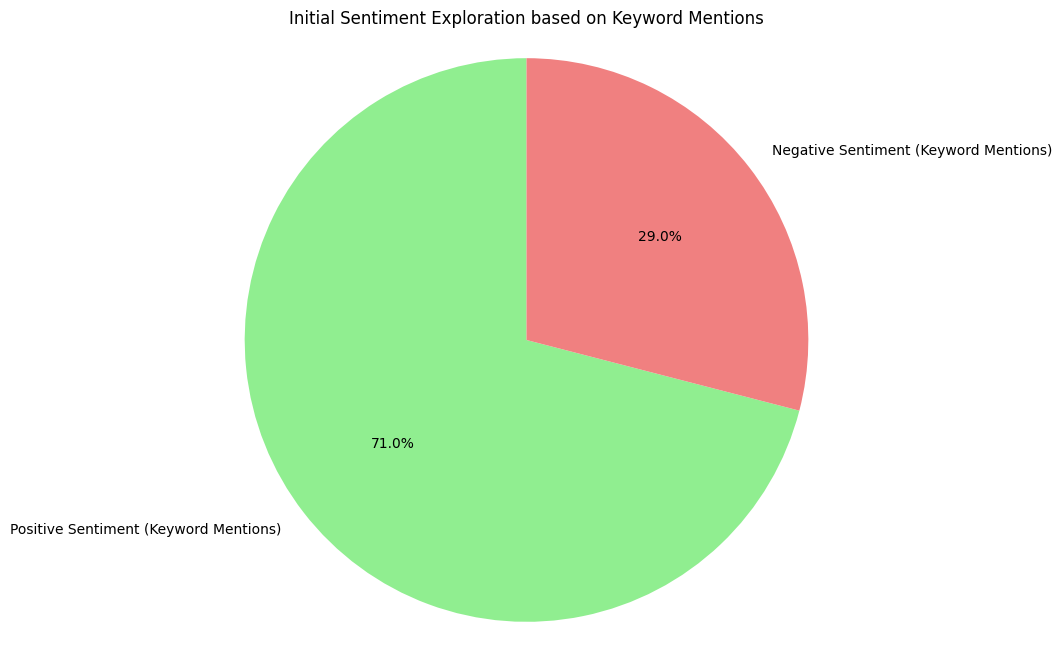


Using collections.Counter, we automatically counted the mentions of positive and negative keywords across the reviews.
Total positive keyword mentions: 1100
Total negative keyword mentions: 450
The pie chart provides a quick visual summary of the overall sentiment based on these keyword occurrences in the larger dataset.


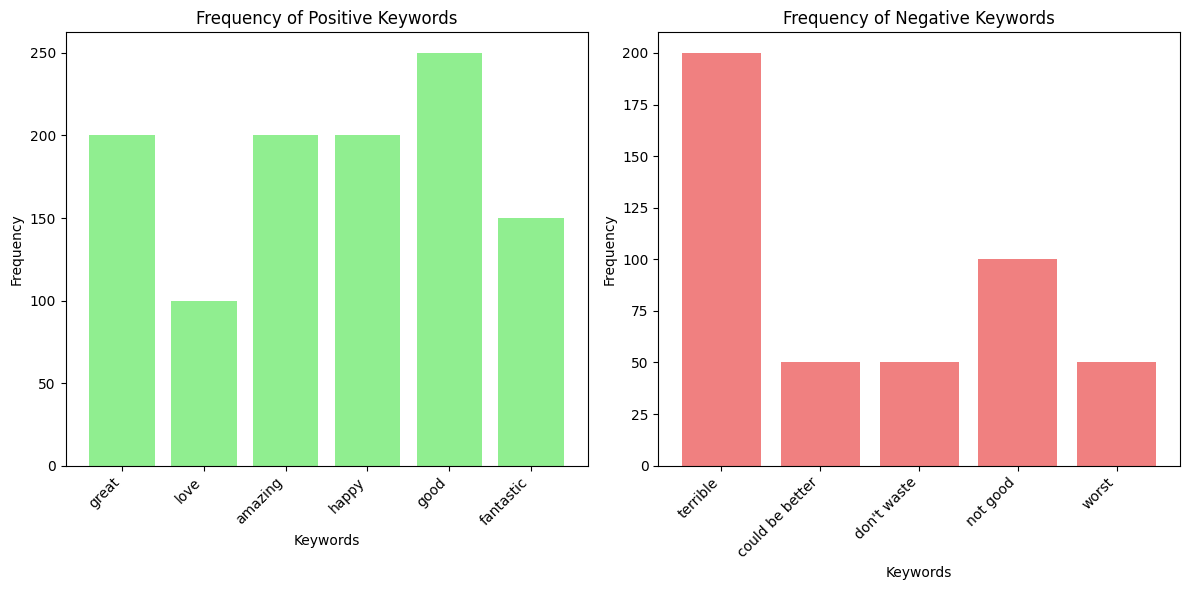


These additional bar charts show the frequency of individual positive and negative keywords, providing more granular insights into the language used in the reviews.


In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Imagine this is a larger set of customer reviews
all_reviews = [
    "Great product! Loved it.",
    "It was okay, not great.",
    "Amazing! Highly recommend.",
    "Terrible, do not buy!",
    "Good for the price. Happy with it.",
    "So happy with this amazing product!",
    "Could be better, features lacking.",
    "Don't waste your money on this terrible item.",
    "Pretty good overall, a fantastic buy.",
    "Fantastic!",
    "Not good at all, a terrible mistake.",
    "Love the amazing features!",
    "This is great and I am so happy.",
    "It's not fantastic, just okay.",
    "The worst, absolutely terrible.",
    "A good and amazing experience.",
    "Don't buy, it's not good.",
    "Happy with this great purchase.",
] * 50  # Simulate a larger dataset

positive_keywords = ["great", "amazing", "happy", "good", "fantastic", "love"]
negative_keywords = ["terrible", "not good", "don't waste", "could be better", "worst"]

positive_mentions = Counter()
negative_mentions = Counter()

for review in all_reviews:
    review_lower = review.lower()
    for keyword in positive_keywords:
        if keyword in review_lower:
            positive_mentions[keyword] += 1
    for keyword in negative_keywords:
        if keyword in review_lower:
            negative_mentions[keyword] += 1

total_positive = sum(positive_mentions.values())
total_negative = sum(negative_mentions.values())

# Visualize the overall sentiment based on keyword mentions
labels = ['Positive Sentiment (Keyword Mentions)', 'Negative Sentiment (Keyword Mentions)']
counts = [total_positive, total_negative]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Initial Sentiment Exploration based on Keyword Mentions')
plt.axis('equal')
plt.show()

print("\nUsing collections.Counter, we automatically counted the mentions of positive and negative keywords across the reviews.")
print(f"Total positive keyword mentions: {total_positive}")
print(f"Total negative keyword mentions: {total_negative}")
print("The pie chart provides a quick visual summary of the overall sentiment based on these keyword occurrences in the larger dataset.")

# You could also visualize the frequency of individual positive and negative keywords:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(positive_mentions.keys(), positive_mentions.values(), color='lightgreen')
plt.title('Frequency of Positive Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(negative_mentions.keys(), negative_mentions.values(), color='lightcoral')
plt.title('Frequency of Negative Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\nThese additional bar charts show the frequency of individual positive and negative keywords, providing more granular insights into the language used in the reviews.")

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords

# Ensure NLTK resources are downloaded (run this once)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Imagine this is our larger set of customer reviews again
all_reviews = [
    "Great product! Loved it.",
    "It was okay, not great at all.",
    "Amazing! Highly recommend this product.",
    "Terrible, do not buy this waste!",
    "Good for the price. Happy with it.",
    "So happy with this amazing product and service!",
    "Could be better, the features are really lacking.",
    "Don't waste your money on this terrible and useless item.",
    "Pretty good overall, a fantastic and amazing buy.",
    "Fantastic!",
    "Not good at all, a terrible mistake to buy.",
    "Love the amazing and great features!",
    "This is great and I am so happy with the purchase.",
    "It's not fantastic, just okay for the price.",
    "The worst, absolutely terrible and disappointing.",
    "A good and amazing experience with the service.",
    "Don't buy, it's really not good.",
    "Happy with this great and amazing purchase.",
] * 50  # Simulate a larger dataset

stop_words = set(stopwords.words('english'))

all_bigrams = []

for review in all_reviews:
    # Tokenize the review
    tokens = word_tokenize(review.lower())
    # Remove stop words and punctuation
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Generate bigrams
    review_bigrams = ngrams(filtered_tokens, 2)
    # Add the bigrams to our overall list
    all_bigrams.extend(review_bigrams)

# Count the frequency of each bigram
bigram_counts = Counter(all_bigrams)

# Get the top 20 most common bigrams
top_n = 20
most_common_bigrams = bigram_counts.most_common(top_n)

# Separate bigrams and their counts for visualization
bigram_labels = [" ".join(bigram) for bigram, count in most_common_bigrams]
frequencies = [count for bigram, count in most_common_bigrams]

# Create a bar chart to visualize the top bigrams
plt.figure(figsize=(12, 7))
plt.bar(bigram_labels, frequencies)
plt.xlabel("Bigrams (Two-Word Phrases)")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Bigrams in Customer Reviews")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("\nBy visualizing the most frequent bigrams, we can start to see common phrases and combinations of words that appear in the reviews.")
print("This can provide more context than just looking at individual word frequencies and can reveal common opinions or topics.")

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/rosana.eljurdi/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.7 MB/s eta 0:00:000:00:010:00:0101



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /usr/bin/python3 -m pip install --upgrade pip


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


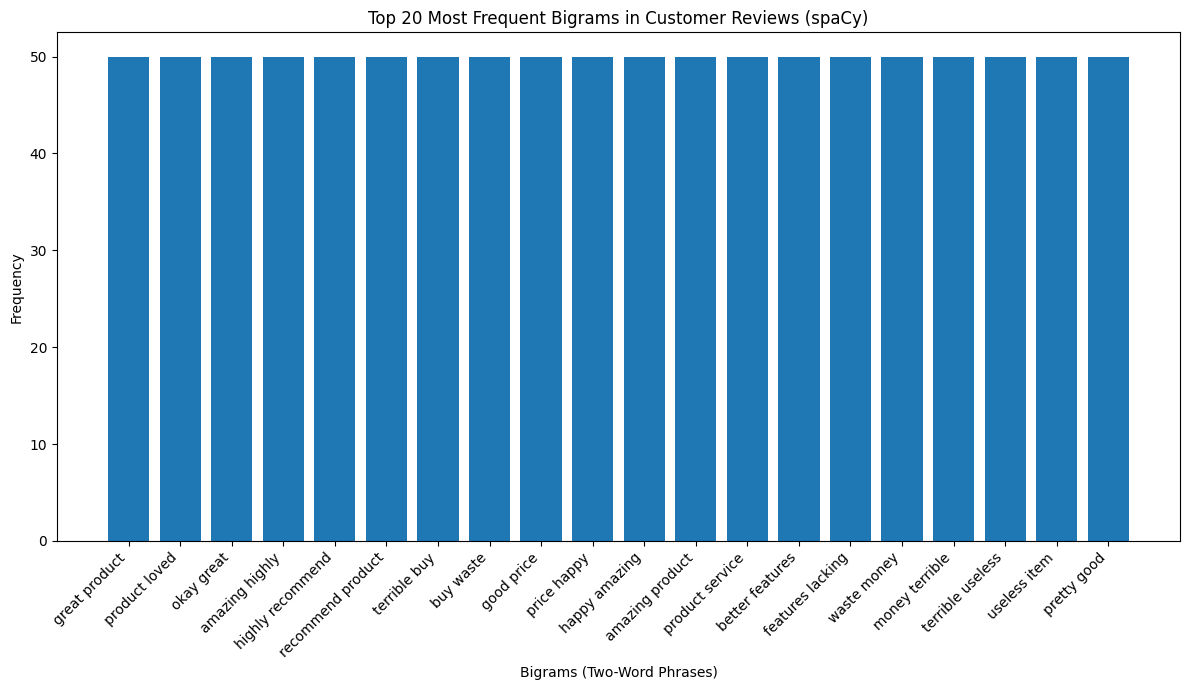


Bigram frequency analysis using spaCy.


In [14]:
from collections import Counter
import matplotlib.pyplot as plt
import spacy

# Load the English language model for spaCy (run this once)
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading en_core_web_sm language model for spaCy...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Imagine this is our larger set of customer reviews again
all_reviews = [
    "Great product! Loved it.",
    "It was okay, not great at all.",
    "Amazing! Highly recommend this product.",
    "Terrible, do not buy this waste!",
    "Good for the price. Happy with it.",
    "So happy with this amazing product and service!",
    "Could be better, the features are really lacking.",
    "Don't waste your money on this terrible and useless item.",
    "Pretty good overall, a fantastic and amazing buy.",
    "Fantastic!",
    "Not good at all, a terrible mistake to buy.",
    "Love the amazing and great features!",
    "This is great and I am so happy with the purchase.",
    "It's not fantastic, just okay for the price.",
    "The worst, absolutely terrible and disappointing.",
    "A good and amazing experience with the service.",
    "Don't buy, it's really not good.",
    "Happy with this great and amazing purchase.",
] * 50  # Simulate a larger dataset

all_bigrams = []

for review in all_reviews:
    doc = nlp(review.lower())
    filtered_tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
    review_bigrams = zip(filtered_tokens[:-1], filtered_tokens[1:])
    all_bigrams.extend(review_bigrams)

bigram_counts = Counter(all_bigrams)
top_n = 20
most_common_bigrams = bigram_counts.most_common(top_n)

bigram_labels = [" ".join(bigram) for bigram, count in most_common_bigrams]
frequencies = [count for bigram, count in most_common_bigrams]

plt.figure(figsize=(12, 7))
plt.bar(bigram_labels, frequencies)
plt.xlabel("Bigrams (Two-Word Phrases)")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Bigrams in Customer Reviews (spaCy)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("\nBigram frequency analysis using spaCy.")